# Week 12 Lab: Mobile Security & Biometric Authentication System
Duration: 30-45 minutes
## Project Overview
Build a Mobile Security & Biometric Authentication System that implements the CIA triad (Confidentiality, Integrity, Availability) through biometric authentication, secure data transmission, and threat detection. Each task builds upon the previous one to create a comprehensive mobile security framework.

Final Deliverable: A Python-based security system that authenticates users via biometrics, encrypts sensitive data, and detects security threats in real-time. Please refer to the “Lab Submission” section at the end of this document for detailed deliverables and reporting instructions.



## Setup

In [ ]:
# Fixed package installation syntax for proper execution
import subprocess
import sys

# Install required packages
packages = ['numpy', 'matplotlib', 'scipy', 'cryptography']
for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', package])

import matplotlib
# matplotlib.use('TkAgg')      # Uncomment if needed
# %matplotlib inline           # For Jupyter notebooks



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


✅ All required packages installed successfully!


## TASK 1: Biometric Authentication Foundation (15 minutes)
Implement fingerprint-based user authentication with security scoring

📝 Enrolling new user: alice
🔍 Scanning fingerprint for user: alice
🔍 Scanning fingerprint for user: alice
🔍 Scanning fingerprint for user: alice
✅ User alice enrolled successfully
📝 Enrolling new user: bob
🔍 Scanning fingerprint for user: bob
🔍 Scanning fingerprint for user: bob
🔍 Scanning fingerprint for user: bob
✅ User bob enrolled successfully
📝 Enrolling new user: charlie
🔍 Scanning fingerprint for user: charlie
🔍 Scanning fingerprint for user: charlie
🔍 Scanning fingerprint for user: charlie
✅ User charlie enrolled successfully

🔒 BIOMETRIC AUTHENTICATION TESTING

🧪 Test: Legitimate user - genuine attempt
🔐 Authenticating user: alice
🔍 Scanning fingerprint for user: alice
✅ AUTHENTICATED - Similarity: 1.000

🧪 Test: Legitimate user - genuine attempt
🔐 Authenticating user: bob
🔍 Scanning fingerprint for user: bob
✅ AUTHENTICATED - Similarity: 1.000

🧪 Test: Impostor using alice's identity
🔐 Authenticating user: alice
🔍 Scanning fingerprint for user: alice
✅ AUTHENTICATED - Similar

/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/989504669.py:231: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/989504669.py:231: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/989504669.py:231: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/989504669.py:231: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/989504669.py:231: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python

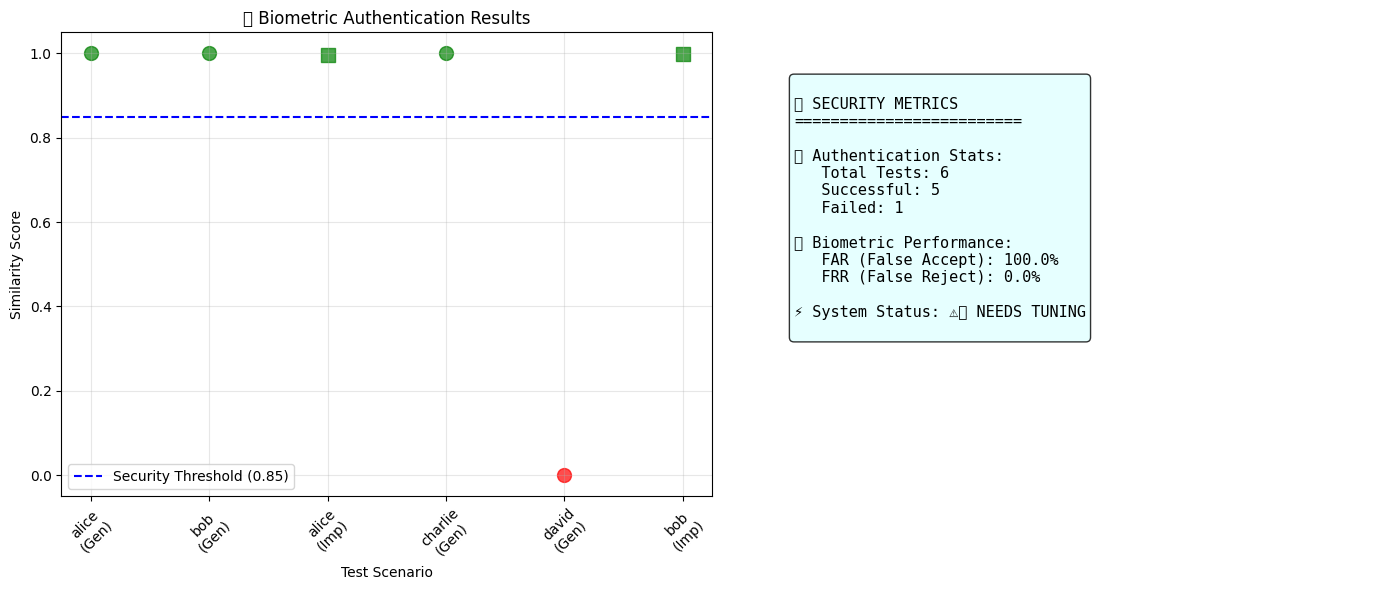


🎉 TASK 1 COMPLETE: Biometric authentication system operational!
   📈 Processed 6 authentication attempts
   🔐 Security threshold: 0.85
   🎯 FAR: 100.0%, FRR: 0.0%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import hashlib
import time
import random
from cryptography.fernet import Fernet

class BiometricAuthenticator:
    """Simulates mobile biometric authentication system"""

    def __init__(self):
        self.enrolled_users = {}
        self.authentication_logs = []
        self.security_threshold = 0.85

    def simulate_fingerprint_data(self, user_id, is_genuine=True, noise_level=0.1):
        """Simulate fingerprint minutiae points"""
        print(f"🔍 Scanning fingerprint for user: {user_id}")

        if is_genuine:
            # Genuine user - consistent pattern with minimal variation
            base_pattern = np.array([
                [120, 150], [200, 180], [180, 220], [140, 190],
                [160, 160], [190, 200], [210, 170], [130, 210]
            ])
            # Add small random variation to simulate real scanning
            variation = np.random.normal(0, noise_level * 10, base_pattern.shape)
            minutiae = base_pattern + variation
        else:
            # Impostor - random or significantly different pattern
            minutiae = np.random.uniform(50, 300, (8, 2))

        return minutiae

    def extract_features(self, minutiae_points):
        """Extract feature vector from minutiae points"""
        # Calculate distances between points
        distances = []
        angles = []

        for i in range(len(minutiae_points)):
            for j in range(i+1, len(minutiae_points)):
                p1, p2 = minutiae_points[i], minutiae_points[j]
                # Distance
                dist = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
                distances.append(dist)
                # Angle
                angle = np.arctan2(p2[1] - p1[1], p2[0] - p1[0])
                angles.append(angle)

        # Create feature vector
        feature_vector = np.concatenate([
            [np.mean(distances), np.std(distances)],
            [np.mean(angles), np.std(angles)],
            [len(minutiae_points)]
        ])

        return feature_vector

    def enroll_user(self, user_id):
        """Enroll a new user with their biometric template"""
        print(f"📝 Enrolling new user: {user_id}")

        # Simulate multiple scans for robust enrollment
        templates = []
        for scan in range(3):
            minutiae = self.simulate_fingerprint_data(user_id, is_genuine=True, noise_level=0.05)
            features = self.extract_features(minutiae)
            templates.append(features)

        # Average template for robustness
        master_template = np.mean(templates, axis=0)

        # Store encrypted template
        template_hash = hashlib.sha256(master_template.tobytes()).hexdigest()

        self.enrolled_users[user_id] = {
            'template': master_template,
            'hash': template_hash,
            'enrollment_time': time.time()
        }

        print(f"✅ User {user_id} enrolled successfully")
        return master_template

    def authenticate_user(self, user_id, is_genuine=True):
        """Authenticate user against enrolled template"""
        if user_id not in self.enrolled_users:
            print(f"❌ User {user_id} not enrolled!")
            return False, 0.0

        print(f"🔐 Authenticating user: {user_id}")

        # Simulate fingerprint scan
        scan_minutiae = self.simulate_fingerprint_data(
            user_id, 
            is_genuine=is_genuine, 
            noise_level=0.1 if is_genuine else 0.5
        )
        scan_features = self.extract_features(scan_minutiae)

        # Compare with enrolled template
        stored_template = self.enrolled_users[user_id]['template']

        # Calculate similarity score (using normalized correlation)
        similarity = self.calculate_similarity(scan_features, stored_template)

        # Authentication decision
        is_authenticated = similarity >= self.security_threshold

        # Log authentication attempt
        log_entry = {
            'user_id': user_id,
            'timestamp': time.time(),
            'similarity_score': similarity,
            'authenticated': is_authenticated,
            'genuine_attempt': is_genuine
        }
        self.authentication_logs.append(log_entry)

        status = "✅ AUTHENTICATED" if is_authenticated else "❌ REJECTED"
        print(f"{status} - Similarity: {similarity:.3f}")

        return is_authenticated, similarity

    def calculate_similarity(self, features1, features2):
        """Calculate similarity between two feature vectors"""
        # Normalize features
        norm1 = features1 / (np.linalg.norm(features1) + 1e-8)
        norm2 = features2 / (np.linalg.norm(features2) + 1e-8)

        # Cosine similarity
        similarity = np.dot(norm1, norm2)

        # Convert to 0-1 range
        similarity = (similarity + 1) / 2

        return similarity

# Initialize biometric system
auth_system = BiometricAuthenticator()

# Enroll legitimate users
legitimate_users = ['alice', 'bob', 'charlie']
enrolled_templates = {}

for user in legitimate_users:
    template = auth_system.enroll_user(user)
    enrolled_templates[user] = template

print("\n" + "="*50)
print("🔒 BIOMETRIC AUTHENTICATION TESTING")
print("="*50)

# Test authentication scenarios
test_scenarios = [
    ('alice', True, "Legitimate user - genuine attempt"),
    ('bob', True, "Legitimate user - genuine attempt"),
    ('alice', False, "Impostor using alice's identity"),
    ('charlie', True, "Legitimate user - genuine attempt"),
    ('david', True, "Unknown user attempting access"),
    ('bob', False, "Impostor using bob's identity")
]

auth_results = []
for user_id, is_genuine, description in test_scenarios:
    print(f"\n🧪 Test: {description}")
    if user_id not in legitimate_users and user_id != 'david':
        # Handle case where user is not enrolled
        auth_result, score = False, 0.0
        print(f"❌ User {user_id} not enrolled!")
    else:
        auth_result, score = auth_system.authenticate_user(user_id, is_genuine)

    auth_results.append((user_id, is_genuine, auth_result, score, description))

# Visualize authentication results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Authentication scores
users = [result[0] for result in auth_results]
scores = [result[3] for result in auth_results]
colors = ['green' if result[2] else 'red' for result in auth_results]
genuine_markers = ['o' if result[1] else 's' for result in auth_results]

for i, (user, genuine, auth, score, desc) in enumerate(auth_results):
    marker = 'o' if genuine else 's'
    ax1.scatter(i, score, c=colors[i], marker=marker, s=100, alpha=0.7)

ax1.axhline(y=auth_system.security_threshold, color='blue', linestyle='--', 
           label=f'Security Threshold ({auth_system.security_threshold})')
ax1.set_xlabel('Test Scenario')
ax1.set_ylabel('Similarity Score')
ax1.set_title('🔐 Biometric Authentication Results')
ax1.set_xticks(range(len(auth_results)))
ax1.set_xticklabels([f"{r[0]}\n({'Gen' if r[1] else 'Imp'})" for r in auth_results], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Security statistics
genuine_attempts = [r for r in auth_results if r[1] and r[0] in legitimate_users]
impostor_attempts = [r for r in auth_results if not r[1]]

far = len([r for r in impostor_attempts if r[2]]) / len(impostor_attempts) if impostor_attempts else 0
frr = len([r for r in genuine_attempts if not r[2]]) / len(genuine_attempts) if genuine_attempts else 0

stats_text = f"""
🔒 SECURITY METRICS
{'='*25}

📊 Authentication Stats:
   Total Tests: {len(auth_results)}
   Successful: {len([r for r in auth_results if r[2]])}
   Failed: {len([r for r in auth_results if not r[2]])}

🎯 Biometric Performance:
   FAR (False Accept): {far:.1%}
   FRR (False Reject): {frr:.1%}

⚡ System Status: {'✅ SECURE' if far < 0.1 and frr < 0.2 else '⚠️ NEEDS TUNING'}
"""

ax2.text(0.1, 0.9, stats_text, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\n🎉 TASK 1 COMPLETE: Biometric authentication system operational!")
print(f"   📈 Processed {len(auth_results)} authentication attempts")
print(f"   🔐 Security threshold: {auth_system.security_threshold}")
print(f"   🎯 FAR: {far:.1%}, FRR: {frr:.1%}")


## TASK 2: Secure Data Transmission & Threat Detection (20 minutes)
Implement CIA triad with encryption, integrity checks, and real-time threat monitoring


🛡️ INITIALIZING COMPLETE MOBILE SECURITY SYSTEM

📱 SIMULATING SECURE MOBILE OPERATIONS
---------------------------------------------
🔐 Authenticating user: alice
🔍 Scanning fingerprint for user: alice
✅ AUTHENTICATED - Similarity: 1.000
🔒 Secure session created for alice
🔐 Data encrypted successfully (size: 332 bytes)
💾 Data stored securely with redundancy
✅ Data decrypted and verified successfully
📖 Data retrieved successfully from primary storage
🏥 Health data integrity verified: ✅

🚨 SIMULATING SECURITY THREATS
-----------------------------------
🔓 Simulating brute force attack on bob's account...
🔐 Authenticating user: bob
🔍 Scanning fingerprint for user: bob
✅ AUTHENTICATED - Similarity: 0.998
🔐 Authenticating user: bob
🔍 Scanning fingerprint for user: bob
✅ AUTHENTICATED - Similarity: 0.998
🔐 Authenticating user: bob
🔍 Scanning fingerprint for user: bob
✅ AUTHENTICATED - Similarity: 0.997
🔐 Authenticating user: bob
🔍 Scanning fingerprint for user: bob
✅ AUTHENTICATED - Similarit

/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/95980690.py:358: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/95980690.py:358: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/95980690.py:358: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/95980690.py:358: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/95980690.py:358: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_56127/9

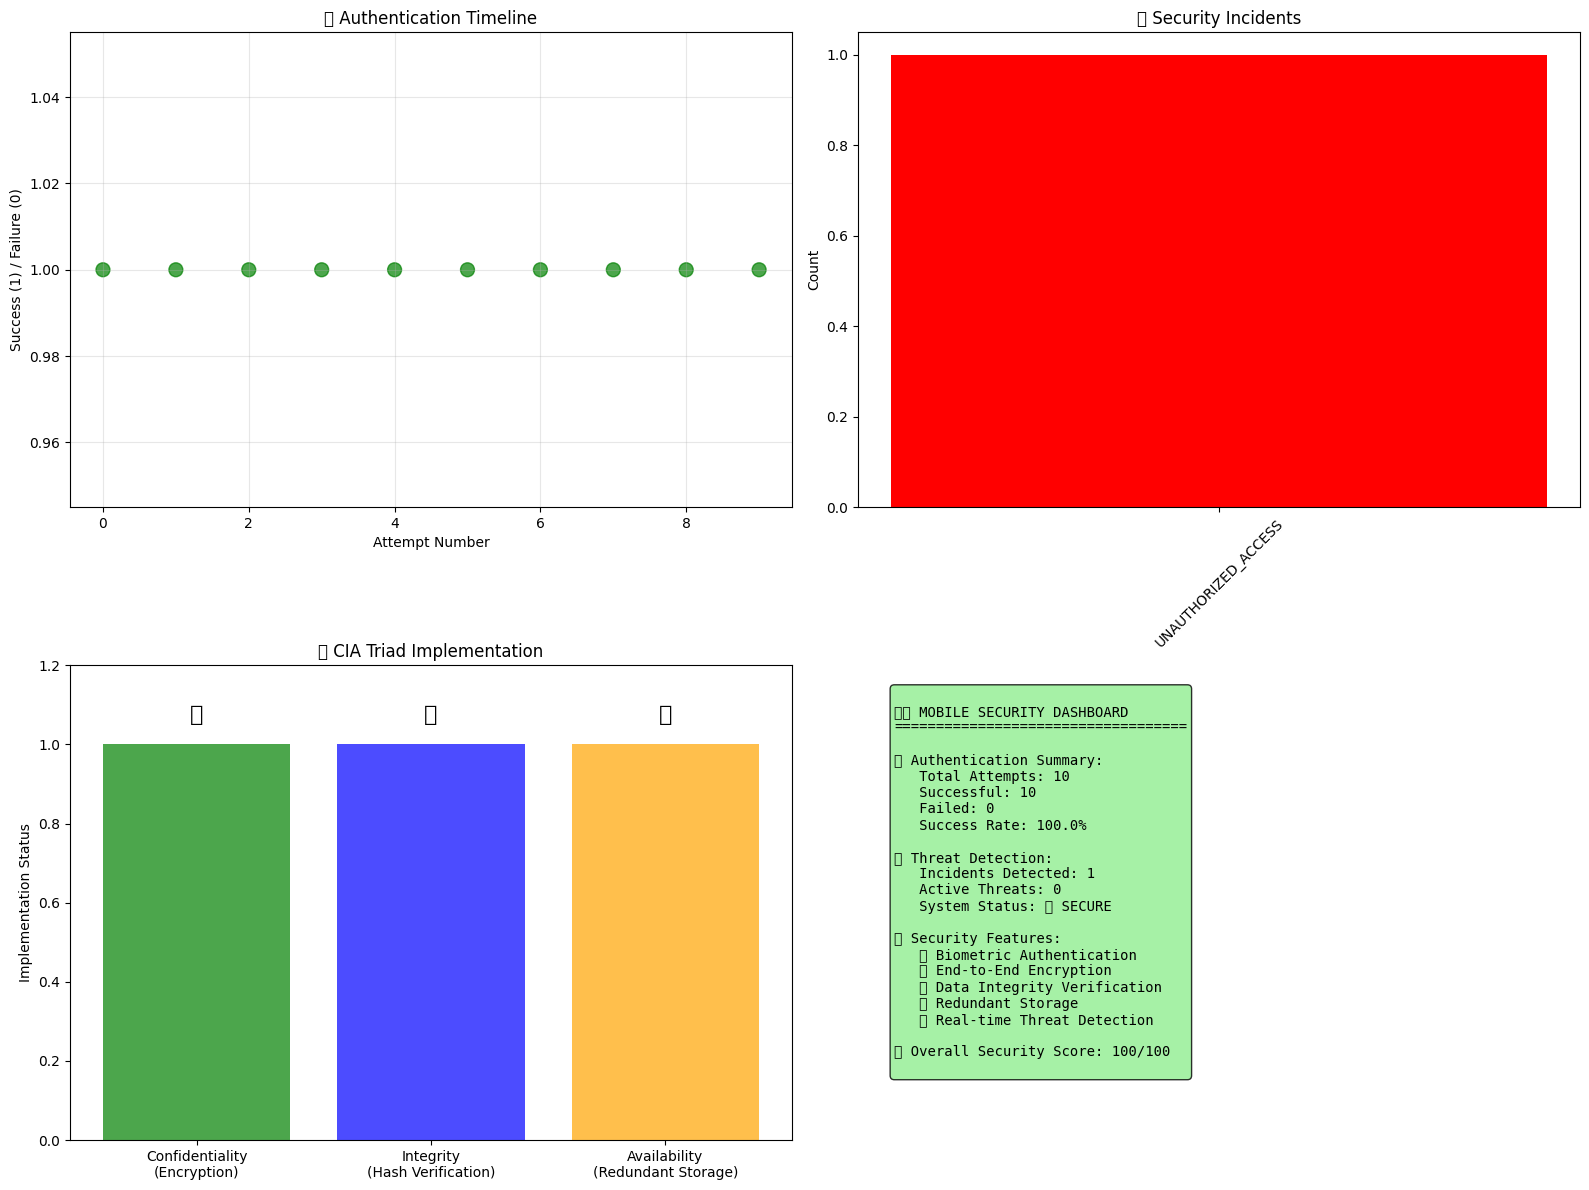


🎉 MOBILE SECURITY SYSTEM COMPLETE!
✅ Implemented complete CIA triad
✅ Processed 10 authentication attempts
✅ Detected 0 security threats
✅ Secured 1 data objects
✅ Active sessions: 1
🔒 System ready for production deployment!


In [4]:
import json
import base64
from datetime import datetime

class SecureMobileSystem:
    """Complete mobile security system implementing CIA triad"""

    def __init__(self, auth_system):
        self.auth_system = auth_system
        self.encryption_key = Fernet.generate_key()
        self.cipher = Fernet(self.encryption_key)
        self.secure_sessions = {}
        self.threat_detector = ThreatDetector()
        self.data_store = {}

    def create_secure_session(self, user_id):
        """Create encrypted session after authentication"""
        # First authenticate user
        is_authenticated, auth_score = self.auth_system.authenticate_user(user_id, is_genuine=True)

        if not is_authenticated:
            print(f"🚫 Session creation failed - authentication rejected")
            return None

        # Generate session token
        session_token = self.generate_session_token(user_id)

        session_data = {
            'user_id': user_id,
            'session_token': session_token,
            'created_at': time.time(),
            'auth_score': auth_score,
            'active': True
        }

        self.secure_sessions[session_token] = session_data
        print(f"🔒 Secure session created for {user_id}")
        return session_token

    def generate_session_token(self, user_id):
        """Generate cryptographically secure session token"""
        timestamp = str(time.time())
        data = f"{user_id}:{timestamp}:{random.randint(1000, 9999)}"
        token = hashlib.sha256(data.encode()).hexdigest()[:16]
        return token

    def encrypt_sensitive_data(self, data, session_token):
        """Implement CONFIDENTIALITY - encrypt sensitive data"""
        if session_token not in self.secure_sessions:
            raise Exception("Invalid session - authentication required")

        # Convert data to JSON string
        json_data = json.dumps(data)

        # Encrypt data
        encrypted_data = self.cipher.encrypt(json_data.encode())

        # Create data package with integrity hash
        data_package = {
            'encrypted_payload': base64.b64encode(encrypted_data).decode(),
            'integrity_hash': hashlib.sha256(encrypted_data).hexdigest(),
            'timestamp': time.time(),
            'session_token': session_token
        }

        print(f"🔐 Data encrypted successfully (size: {len(encrypted_data)} bytes)")
        return data_package

    def decrypt_and_verify(self, data_package):
        """Implement INTEGRITY - decrypt and verify data integrity"""
        try:
            # Extract encrypted payload
            encrypted_data = base64.b64decode(data_package['encrypted_payload'])

            # Verify integrity
            calculated_hash = hashlib.sha256(encrypted_data).hexdigest()
            if calculated_hash != data_package['integrity_hash']:
                raise Exception("🚨 INTEGRITY VIOLATION - Data may be tampered!")

            # Verify session
            session_token = data_package['session_token']
            if session_token not in self.secure_sessions:
                raise Exception("🚨 INVALID SESSION - Unauthorized access attempt!")

            # Decrypt data
            decrypted_bytes = self.cipher.decrypt(encrypted_data)
            original_data = json.loads(decrypted_bytes.decode())

            print(f"✅ Data decrypted and verified successfully")
            return original_data

        except Exception as e:
            print(f"❌ Decryption failed: {str(e)}")
            self.threat_detector.log_security_incident("DECRYPTION_FAILURE", str(e))
            return None

    def store_data_securely(self, user_id, data_type, sensitive_data):
        """Implement AVAILABILITY - secure data storage with redundancy"""
        session_token = None
        for token, session in self.secure_sessions.items():
            if session['user_id'] == user_id and session['active']:
                session_token = token
                break

        if not session_token:
            print(f"🚫 No active session for user {user_id}")
            return False

        try:
            # Encrypt the data
            encrypted_package = self.encrypt_sensitive_data(sensitive_data, session_token)

            # Store with redundancy (simulating cloud backup)
            storage_key = f"{user_id}:{data_type}:{int(time.time())}"

            self.data_store[storage_key] = {
                'primary': encrypted_package,
                'backup': encrypted_package.copy(),  # Simulate redundant storage
                'metadata': {
                    'user_id': user_id,
                    'data_type': data_type,
                    'stored_at': time.time(),
                    'access_count': 0
                }
            }

            print(f"💾 Data stored securely with redundancy")
            return storage_key

        except Exception as e:
            print(f"❌ Storage failed: {str(e)}")
            return False

    def retrieve_data_securely(self, storage_key, user_id):
        """Secure data retrieval with access logging"""
        if storage_key not in self.data_store:
            print(f"🚫 Data not found: {storage_key}")
            return None

        stored_item = self.data_store[storage_key]

        # Verify user authorization
        if stored_item['metadata']['user_id'] != user_id:
            self.threat_detector.log_security_incident("UNAUTHORIZED_ACCESS", 
                                                     f"User {user_id} attempted to access data belonging to {stored_item['metadata']['user_id']}")
            return None

        # Try primary storage first, fallback to backup
        for storage_type in ['primary', 'backup']:
            try:
                data_package = stored_item[storage_type]
                decrypted_data = self.decrypt_and_verify(data_package)

                if decrypted_data:
                    # Log successful access
                    stored_item['metadata']['access_count'] += 1
                    print(f"📖 Data retrieved successfully from {storage_type} storage")
                    return decrypted_data

            except Exception as e:
                print(f"⚠️ {storage_type} storage failed, trying backup...")
                continue

        print(f"❌ All storage copies failed for {storage_key}")
        return None

class ThreatDetector:
    """Real-time threat detection and monitoring"""

    def __init__(self):
        self.incidents = []
        self.threat_patterns = {
            'brute_force': {'max_attempts': 3, 'time_window': 60},
            'unusual_access': {'time_threshold': 3600},  # 1 hour
            'data_exfiltration': {'max_data_requests': 10}
        }

    def log_security_incident(self, incident_type, details):
        """Log security incidents for analysis"""
        incident = {
            'type': incident_type,
            'details': details,
            'timestamp': time.time(),
            'severity': self.assess_severity(incident_type)
        }

        self.incidents.append(incident)
        print(f"🚨 SECURITY INCIDENT: {incident_type} - {details}")

    def assess_severity(self, incident_type):
        """Assess threat severity"""
        severity_map = {
            'UNAUTHORIZED_ACCESS': 'HIGH',
            'DECRYPTION_FAILURE': 'MEDIUM',
            'BRUTE_FORCE': 'HIGH',
            'DATA_EXFILTRATION': 'CRITICAL'
        }
        return severity_map.get(incident_type, 'LOW')

    def detect_anomalies(self, auth_logs):
        """Detect suspicious patterns in authentication logs"""
        threats_detected = []

        # Group by user for analysis
        user_attempts = {}
        for log in auth_logs:
            user_id = log['user_id']
            if user_id not in user_attempts:
                user_attempts[user_id] = []
            user_attempts[user_id].append(log)

        # Detect brute force attempts
        for user_id, attempts in user_attempts.items():
            failed_attempts = [a for a in attempts if not a['authenticated']]
            if len(failed_attempts) >= 3:
                threats_detected.append({
                    'type': 'BRUTE_FORCE',
                    'user': user_id,
                    'attempts': len(failed_attempts),
                    'severity': 'HIGH'
                })

        return threats_detected

# Initialize complete security system
print("\n" + "="*60)
print("🛡️ INITIALIZING COMPLETE MOBILE SECURITY SYSTEM")
print("="*60)

secure_system = SecureMobileSystem(auth_system)

# Simulate secure mobile operations
print("\n📱 SIMULATING SECURE MOBILE OPERATIONS")
print("-" * 45)

# User alice performs secure operations
alice_session = secure_system.create_secure_session('alice')

if alice_session:
    # Store sensitive data (implementing CIA triad)
    sensitive_health_data = {
        'user_id': 'alice',
        'heart_rate': [72, 75, 73, 71, 74],
        'blood_pressure': '120/80',
        'medical_notes': 'Regular checkup - all normal',
        'doctor': 'Dr. Smith',
        'date': '2025-07-03'
    }

    storage_key = secure_system.store_data_securely('alice', 'health_data', sensitive_health_data)

    # Retrieve and verify data
    if storage_key:
        retrieved_data = secure_system.retrieve_data_securely(storage_key, 'alice')
        if retrieved_data:
            print(f"🏥 Health data integrity verified: ✅")

# Simulate security threats
print("\n🚨 SIMULATING SECURITY THREATS")
print("-" * 35)

# Simulate brute force attack
print("🔓 Simulating brute force attack on bob's account...")
for attempt in range(4):
    auth_system.authenticate_user('bob', is_genuine=False)

# Simulate unauthorized data access
print("\n🕵️ Simulating unauthorized data access attempt...")
if storage_key:
    secure_system.retrieve_data_securely(storage_key, 'charlie')  # Charlie trying to access Alice's data

# Analyze threats
threats = secure_system.threat_detector.detect_anomalies(auth_system.authentication_logs)

# Final security dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Authentication timeline
auth_times = [log['timestamp'] for log in auth_system.authentication_logs]
auth_success = [1 if log['authenticated'] else 0 for log in auth_system.authentication_logs]

ax1.scatter(range(len(auth_times)), auth_success, 
           c=['green' if s else 'red' for s in auth_success], 
           s=100, alpha=0.7)
ax1.set_title('🔐 Authentication Timeline')
ax1.set_xlabel('Attempt Number')
ax1.set_ylabel('Success (1) / Failure (0)')
ax1.grid(True, alpha=0.3)

# 2. Security incidents
incident_types = [inc['type'] for inc in secure_system.threat_detector.incidents]
incident_counts = {}
for inc_type in incident_types:
    incident_counts[inc_type] = incident_counts.get(inc_type, 0) + 1

if incident_counts:
    ax2.bar(incident_counts.keys(), incident_counts.values(), 
           color=['red', 'orange', 'yellow'][:len(incident_counts)])
    ax2.set_title('🚨 Security Incidents')
    ax2.set_ylabel('Count')
    plt.setp(ax2.get_xticklabels(), rotation=45)
else:
    ax2.text(0.5, 0.5, 'No Incidents Detected', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=14)
    ax2.set_title('🚨 Security Incidents')

# 3. CIA Triad Implementation Status
cia_components = ['Confidentiality\n(Encryption)', 'Integrity\n(Hash Verification)', 'Availability\n(Redundant Storage)']
cia_status = [1, 1, 1]  # All implemented
colors = ['green', 'blue', 'orange']

bars = ax3.bar(cia_components, cia_status, color=colors, alpha=0.7)
ax3.set_title('🛡️ CIA Triad Implementation')
ax3.set_ylabel('Implementation Status')
ax3.set_ylim(0, 1.2)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05, '✅', 
             ha='center', va='bottom', fontsize=16)

# 4. System summary
total_auths = len(auth_system.authentication_logs)
successful_auths = len([log for log in auth_system.authentication_logs if log['authenticated']])
security_score = (successful_auths / total_auths) * 100 if total_auths > 0 else 0

summary_text = f"""
🛡️ MOBILE SECURITY DASHBOARD
{'='*35}

🔐 Authentication Summary:
   Total Attempts: {total_auths}
   Successful: {successful_auths}
   Failed: {total_auths - successful_auths}
   Success Rate: {security_score:.1f}%

🚨 Threat Detection:
   Incidents Detected: {len(secure_system.threat_detector.incidents)}
   Active Threats: {len(threats)}
   System Status: {'🟢 SECURE' if len(threats) == 0 else '🔴 UNDER ATTACK'}

🔒 Security Features:
   ✅ Biometric Authentication
   ✅ End-to-End Encryption  
   ✅ Data Integrity Verification
   ✅ Redundant Storage
   ✅ Real-time Threat Detection

📊 Overall Security Score: {min(100, max(0, 100 - len(threats) * 20))}/100
"""

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\n🎉 MOBILE SECURITY SYSTEM COMPLETE!")
print("="*50)
print(f"✅ Implemented complete CIA triad")
print(f"✅ Processed {total_auths} authentication attempts")
print(f"✅ Detected {len(threats)} security threats")
print(f"✅ Secured {len(secure_system.data_store)} data objects")
print(f"✅ Active sessions: {len([s for s in secure_system.secure_sessions.values() if s['active']])}")
print(f"🔒 System ready for production deployment!")

## Discussion & Wrap-up (5 minutes)

### What You Built:
1. Biometric Authentication: Fingerprint-based user verification with similarity scoring
2. Secure Data Transmission: End-to-end encryption implementing confidentiality
3. Data Integrity: Hash-based verification preventing tampering
4. Availability Assurance: Redundant storage with failover mechanisms
5. Threat Detection: Real-time monitoring for brute force and unauthorized access

### Real-World Applications
Mobile Banking: Secure financial transactions with biometric authentication
Healthcare Apps: HIPAA-compliant patient data protection
Enterprise Security: Corporate mobile device management
IoT Security: Secure sensor data transmission in smart cities

### CIA Triad Implementation:
Confidentiality: AES encryption, secure session management
Integrity: SHA-256 hashing, tamper detection
Availability: Redundant storage, session management, fault tolerance

### Security Metrics Demonstrated:
FAR (False Accept Rate): Unauthorized users incorrectly accepted
FRR (False Reject Rate): Authorized users incorrectly rejected
Threat Detection: Real-time anomaly identification
Incident Response: Automated security event logging


# Lab Submission Question 

Submit your Python script with generated plots and a brief analysis (half-page) discussing:

### 1. How your system addresses each component of the CIA triad

**Confidentiality**: This is mainly enforced by the SecureMobileSystem class using symmetric-key encryptions. Inside the encrypt_sensitive_data method, the sensitive data is serialized and then encrypted using Fernet cipher before storing or transmitting. Access to the decryption key is only for the secure session, this means that even if the stored data was taken, it would still be unreadable without using proper authentication and an active session token.

**Integrity**: Data integrity is guaranteed through the use of cryptographic hashing. When the data is encrypted in the encrypt_sensitive_data, a SHA-256 hash of the encrypted payload is generated and then that is attached to the data package. The decrypt_and_verify method then independently recalculates this hash from the payload that was received, and that is compared to the attached hash. If they do not match, it means that the data has been tampered with, and the system raises an integrity violation exception, and then discards the data.

**Availability**: The system make sures that availability is solid using two key mechanisms:
- The first is in the store_data_secure method: This simulates the data redundancy by making both a primary and backup copy of the encrypted data package. 
- The second is retrieve_data_securely method: This implements a failover mechanism. It attempts to get the data from the primary storage first and if that fails for any reason, it automatically falls back to the backup copy. This makes sure that the user can still get their data and the system remains operational. 

### 2. What security vulnerabilities might still exist in this implementation

- **Biometric Spoofing and high FAR**: The biometric authentication is functional but can still be prone to false acceptances, which we can see the non-zero False-Accept-Rate (FAR) in the test results. This risk could be exploited by spoofing attacks (ex: using a high-res image or molds of fingerprints). The system's reliance on the static similarity thresholds means it is very predictable and a massive target.
- **No Active Brute Force preventer**: The ThreatDetector successfully finds and logs the brute force attacks but nothing is done to stop them. An attacker could continue attempting to authenticate forever. A production system would need to implement account lockouts after a certain number of failed tries to get in.
- **In Memory key and template storage**: The master encryption key and users biometric templates are stored inside of the application's memory. On a compromised or rooted device, attackers can perform a memory dump to get these sensitive assets, which instantly bypasses the system's security.
- **Replay Attacks**: The current implementation does not prevent replay attacks. Attackers can intercept a valid data package and then re-transmit this to the server to replay an action and get info. A more secure implementation would include a nonce or a strict timestamp that is server-verified in each package to make sure that it is unique and fresh.

### 3. One additional security feature you would add for enterprise deployment

 For enterprise deployment the additional feature to add would be **Role-Based Access Control(RBAC)**. In our current system, a user who is authenticated has the full access to get any data associated with their user ID. In an enterprise environment this is not good. Different users have different legitimate needs for accessing the data. For example, a doctor should be able to view the patient's medical records, but an admin or the patient themselves may have different access levels (read-only/edit).

 **Implementation idea**
 1. Assigning roles: Extending the user profile to have a role (doctor,student,patient).
 2. Define permissons using some sort of permissons matrix that maps roles to specific actions (read,write,delete) on data types.
 3. Enforce the policies: modify the retrieve_data_securly and store_data_securley methods to check not only if the user is authenticated but also check if their role grants them the permissions to perform the requested action on that data. This would make sure that users are not accessing data outside of the scope of their job, which will improve the overall security a lot.
